## EDA

In [1]:
#primary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading data
data = pd.read_csv("LoanExport\LoanExport.csv", na_values=["", " ", "NA", "null", "Nan", "NaN"])
data.head()


<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
C:\Users\DELL\AppData\Local\Temp\ipykernel_15424\334565862.py:2: SyntaxWarning: invalid escape sequence '\L'
  data = pd.read_csv("LoanExport\LoanExport.csv", na_values=["", " ", "NA", "null", "Nan", "NaN"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15424\334565862.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("LoanExport\LoanExport.csv", na_values=["", " ", "NA", "null", "Nan", "NaN"])


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [3]:
data.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [3]:
categorical_features=data.select_dtypes(include=['object']).columns
numerical_values= data.select_dtypes(include=['int64','float64']).columns


In [4]:
print('number of lines   :',data.shape[0])
missing_values=data.isnull().sum()
print(missing_values)
print('number of missing values :',missing_values[missing_values > 0].sum())


number of lines   : 291451
CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64
number of missing values : 24994


In [7]:
print('column of missing value  : ',data['SellerName'].dtypes)

print('unique value : ',data['SellerName'].unique())
print('number of unique value : ',len(data['SellerName'].unique()))

print('frequence of missing value : ',data['SellerName'].value_counts() )
print(f"number of missing value : {data['SellerName'].isnull().sum()} in {data.shape[0]}")
print(f"percentage of missing value : {round(data['SellerName'].isnull().sum()/data.shape[0]*100,2)}%")


column of missing value  :  object
unique value :  ['FL' 'FT' 'GM' 'Ot' 'RE' 'NO' 'ST' 'CR' 'CH' 'FI' 'HO' 'PR' nan 'PN' 'WA'
 'BA' 'G ' 'OL' 'AC' 'CO' 'BI']
number of unique value :  21
frequence of missing value :  SellerName
Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: count, dtype: int64
number of missing value : 24994 in 291451
percentage of missing value : 8.58%


Our goal :
The project aims to predict the risk of prepayment of a mortgage, which directly affects the profitability of MBS.

base on our data variables we can suspect that it depend of
 CreditScore , PostalCode , PropertyState , OrigInterestRate , ProductType , LoanPurpose , PPM , MonthsInRepayment , OrigUPB , OCLTV , LTV

 source from https://www.wallstreetprep.com/knowledge/prepayment-risk/#:~:text=Prepayment%20risk%20is%20frequently%20considered,of%20debt%20securities%20and%20the

base on https://www.newyorkfed.org/research/data_indicators/mbs_data.html source we can define target as :

In [5]:
data['Prepaid_Proxy'] = ((data['MonthsInRepayment'] < 60) & (data['EverDelinquent'] == 0)).astype(int)


handeling missingvalue


In [6]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

data['SellerName'] = data['SellerName'].fillna('Missing')
contingency_table = pd.crosstab(data['SellerName'], data['Prepaid_Proxy'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi² = {chi2:.2f}")
print(f"p-value = {p_value:.4f}")

r, c = contingency_table.shape
n = contingency_table.sum().sum()

if r > 1 and c > 1:
    cramers_v_value = np.sqrt(chi2 / (n * min(r - 1, c - 1)))
else:
    cramers_v_value = 0

print(f"Cramér's V = {cramers_v_value:.4f}")


Chi² = 2779.39
p-value = 0.0000
Cramér's V = 0.0977


Chi² test does not reject hypothesis of independence → p-value = 1.0

Cramér's V = 0.0 → null strength of association

The variable tested provides no useful information for predicting Prepaid_Proxy.

In [7]:
data = data.drop(columns=['SellerName'])
data

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Prepaid_Proxy
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,WASHINGTONMUTUALBANK,0,0,52,1
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,CHASEHOMEFINANCELLC,0,0,144,0
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,WASHINGTONMUTUALBANK,0,0,67,0
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GMACMTGECORP,0,0,35,1
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GMACMTGECORP,0,0,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Other servicers,0,0,12,1
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Other servicers,0,0,53,1
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Other servicers,0,0,38,1
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Other servicers,0,0,32,1


In [18]:
categorical_features = categorical_features.drop('SellerName', errors='ignore')

Histogrammes des variables numériques


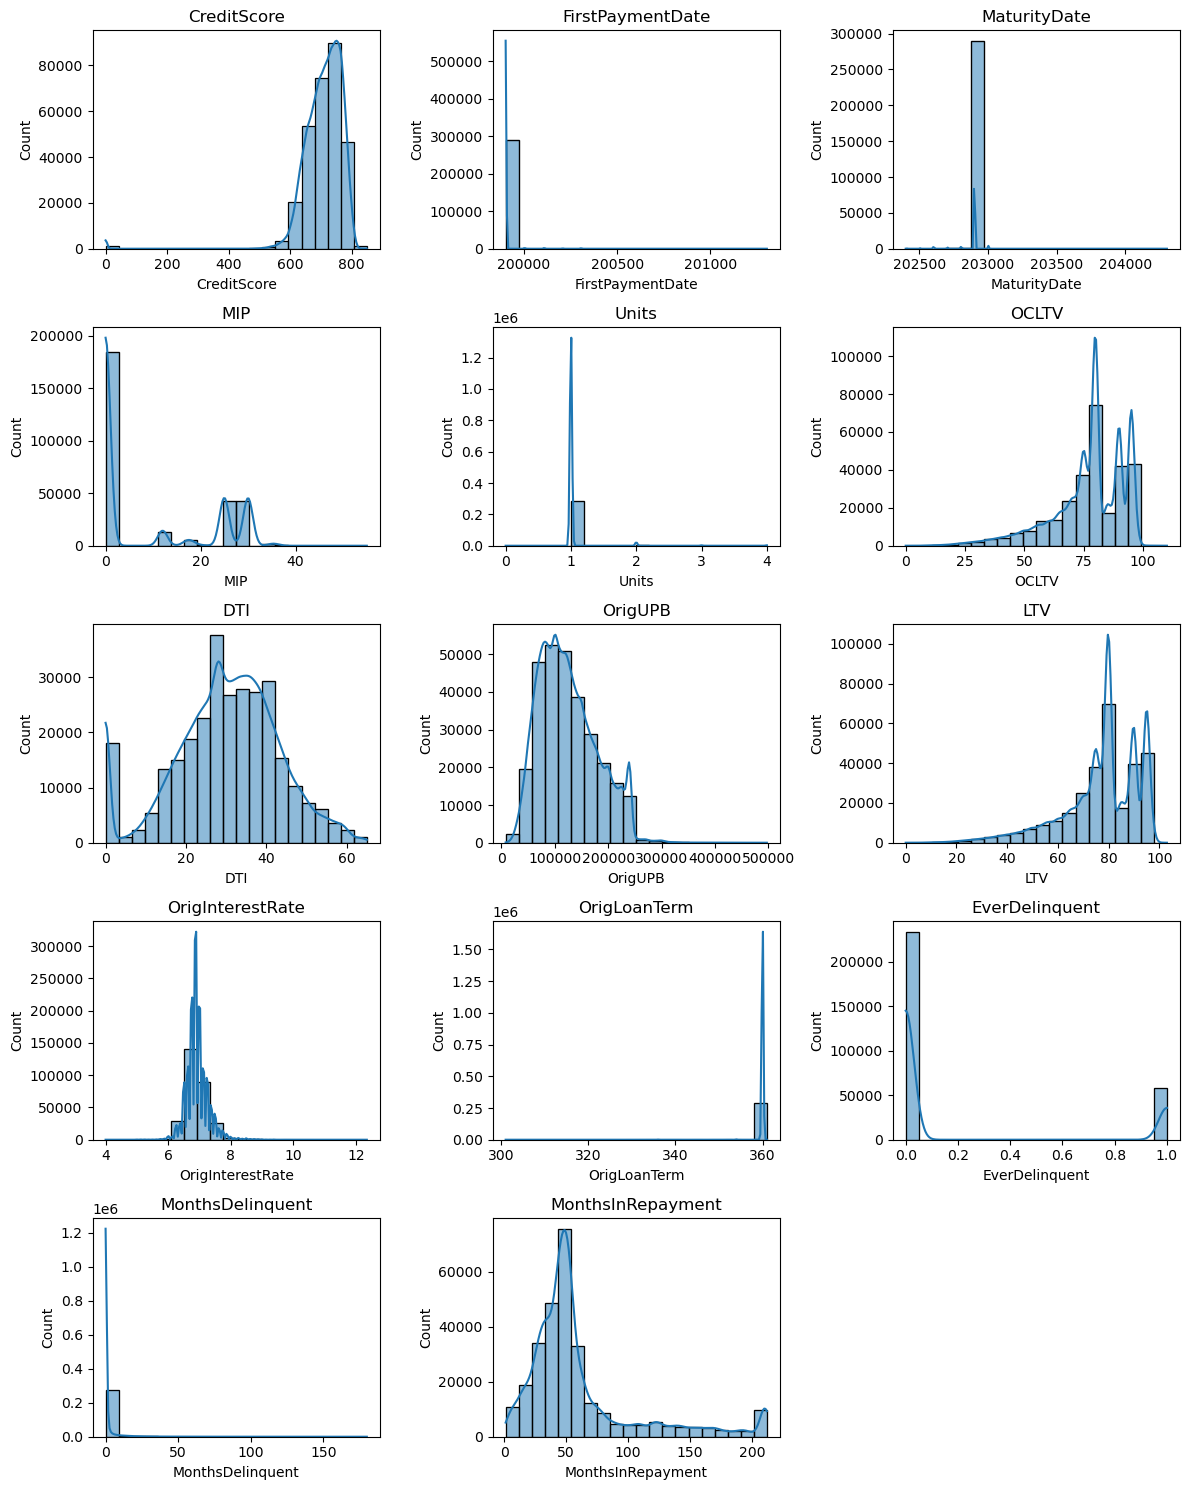

In [11]:
num_cols = len(numerical_values)
n_cols = 3
n_rows = (num_cols + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(numerical_values):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.histplot(data[col].dropna(), kde=True, bins=20)
  plt.title(col)
  plt.tight_layout()

plt.show()

 Observations:

CreditScore: distribution concentrated around 600-800, which is typical for qualified loans. No major outliers.

OrigUPB (amount borrowed): straight asymmetrical shape, majority around 50,000-200,000.

DTI (Debt-to-Income ratio): centered around 25, normal, with few extremes >50.

LTV and OCLTV: peaks close to 80-100, which is expected (LTV ≤ 80% is an industry standard).

OrigInterestRate: concentration around 6.5-7.5%, narrow distribution.

MonthsInRepayment: left asymmetrical, with a strong peak between 40 and 80 → lots of Prepaid_Proxy loans in the early years.

 Please note:

MIP, Units and EverDelinquent seem to be unbalanced

Analyse des variables catégorielles

In [12]:
categorical_features = data.select_dtypes(include=['object']).columns
n_cols_cat = 3
n_rows_cat = (len(categorical_features) + n_cols_cat - 1) // n_cols_cat

plt.figure(figsize=(n_cols_cat * 5, n_rows_cat * 4))

for i, col in enumerate(categorical_features):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1)
    data[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

KeyboardInterrupt: 

 Observations:

FirstTimeHomebuyer: majority non-first-time buyers (N).

Occupancy: majority of primary residences (O).

ProductType: 100% "FRM" (Fixed Rate Mortgage), therefore variable useless (delete).

Channel and LoanPurpose: well distributed, interesting variables.

PPM: 95% in N, therefore very unbalanced → keep with caution.

PropertyState, PostalCode, ServicerName: widely dispersed, beware of one-hot encoding explosion → group rare categories together.

Corrélation entre les variables numériques

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(10, 8))
corr = data[numerical_values].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Corrélation incluant Prepaid")
plt.tight_layout()
plt.show()

LTV, OCLTV, MIP are correlated with each other (~0.7), which is logical (all related to financing).

OrigLoanTerm weakly correlated with the others except FirstPaymentDate (because some durations ≠ 360?) and MaturityDate.

EverDelinquent is moderately correlated with MonthsDelinquent and MonthsInRepayment → good signal

Visualisation vs la variable Prepaid_Proxy

In [ ]:
n_cols_box = 3
n_rows_box = (len(numerical_values) + n_cols_box - 1) // n_cols_box

plt.figure(figsize=(n_cols_box * 6, n_rows_box * 4))

for i, col in enumerate(numerical_values):
    plt.subplot(n_rows_box, n_cols_box, i + 1)
    sns.boxplot(x='Prepaid_Proxy', y=col, data=data)
    plt.title(f"{col} vs Prepaid_Proxy")

plt.tight_layout()
plt.show()


 Analysis of numerical variables in relation to Prepaid_Proxy
To better understand the factors influencing the risk of prepayment (Prepaid_Proxy), we visualized the distribution of numerical variables by class (0 = not Prepaid_Proxy, 1 = Prepaid_Proxy) via boxplots.

 Key observations:
MonthsInRepayment :

Loans repaid early (1) logically have a much shorter repayment period than those not repaid (0).

This behavior validates the correct construction of the target variable.

OrigLoanTerm:

Most loans have a fixed term of 360 months, with little variance.

This field provides no discriminating information → candidate for deletion.

OrigUPB, LTV, OCLTV, DTI, CreditScore:

These variables show interesting variations between the two groups:

Loans repaid early tend to have:

A slightly higher initial loan amount (OrigUPB).

A slightly higher LTV/OCLTV value.

A slightly lower DTI.

A slightly higher credit score.

These financial indicators are therefore informatively relevant.

OrigInterestRate:

Borrowers who have Prepaid_Proxy have slightly higher interest rates.

This could indicate more frequent refinancing among them → relevant variable.

EverDelinquent:

Loans repaid early are very rarely in default.

Conversely, loans that have not been repaid parf

In [8]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd

# Supposons que data soit ton DataFrame
group0 = data[data['Prepaid_Proxy'] == 0]
group1 = data[data['Prepaid_Proxy'] == 1]

ttest_results = {}

for col in numerical_values:
    try:
        stat, p = ttest_ind(group0[col].dropna(), group1[col].dropna(), equal_var=False)
        ttest_results[col] = p
    except Exception as e:
        ttest_results[col] = f"Error: {e}"

# Résultats triés par p-value
ttest_results_data = pd.DataFrame.from_dict(ttest_results, orient='index', columns=['p-value']).sort_values(by='p-value')
print("\nT-test p-values by feature:\n", ttest_results_data)



T-test p-values by feature:
                          p-value
CreditScore         0.000000e+00
OrigUPB             0.000000e+00
EverDelinquent      0.000000e+00
MonthsDelinquent    0.000000e+00
MonthsInRepayment   0.000000e+00
OrigInterestRate   7.956107e-166
LTV                 1.430478e-62
OCLTV               1.463322e-62
MIP                 5.221221e-35
DTI                 4.429961e-30
Units               3.299554e-27
FirstPaymentDate    4.690049e-14
OrigLoanTerm        1.665613e-08
MaturityDate        9.957028e-01


we can Keep the following variables:
CreditScore, OrigUPB, EverDelinquent, MonthsDelinquent, MonthsInRepayment,
OrigInterestRate, LTV, OCLTV, DTI,MIP, Units, FirstPaymentDate.

and Drop due to redundancy or lack of significance:
MaturityDate, possibly OrigLoanTerm (low variance).



In [20]:
data.drop(columns=['MaturityDate'], inplace=True)


In [14]:
from scipy.stats import chi2_contingency

chi2_results = {}
for col in categorical_features:  # liste de tes variables catégorielles
    try:
        contingency_table = pd.crosstab(data[col], data['Prepaid_Proxy'])
        stat, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results[col] = p
    except Exception as e:
        chi2_results[col] = f"Error: {e}"

# Séparer les résultats valides et les erreurs
chi2_valid = {k: v for k, v in chi2_results.items() if isinstance(v, float)}
chi2_errors = {k: v for k, v in chi2_results.items() if not isinstance(v, float)}

# Créer un DataFrame avec les résultats valides triés
chi2_results_data = pd.DataFrame.from_dict(chi2_valid, orient='index', columns=['p-value'])
chi2_results_data = chi2_results_data.sort_values(by='p-value')

print("\n✅ Chi² test p-values by categorical feature:\n")
print(chi2_results_data)

# Afficher les erreurs à part si besoin
if chi2_errors:
    print("\n⚠️ Features skipped due to errors:\n")
    for col, err in chi2_errors.items():
        print(f"{col}: {err}")


✅ Chi² test p-values by categorical feature:

                          p-value
MSA                  0.000000e+00
PropertyState        0.000000e+00
PostalCode           0.000000e+00
NumBorrowers         0.000000e+00
ServicerName         0.000000e+00
LoanPurpose         1.255643e-122
Occupancy            4.870520e-95
PropertyType         6.086852e-87
PPM                  1.637109e-69
FirstTimeHomebuyer   1.173935e-30
Channel              5.171384e-22
LoanSeqNum           4.991291e-01
ProductType          1.000000e+00

⚠️ Features skipped due to errors:

SellerName: Error: 'SellerName'


In [ ]:
for column in data.columns :
    print(f'values taken by variable {column} : ')
    print(data[column].unique())

In [ ]:
data = data['ProductType'].drop(columns=['ProductType']) #because there is a constante value in the column

In [16]:
data['LoanSeqNum'].unique()

array(['F199Q1268030', 'F199Q1015092', 'F199Q1266886', ...,
       'F199Q1401282', 'F199Q1220924', 'F199Q1220923'], dtype=object)

### ✅ Chi² Test Analysis for Categorical Variables

After performing the Chi² test of independence to evaluate associations between categorical variables and the target `Prepaid_Proxy`, we found the following:

#### 🔹 Variables significantly associated with the target (p < 0.05):

| Variable              | Interpretation                                                                 |
|-----------------------|---------------------------------------------------------------------------------|
| `MSA`                 | Geographical area may influence prepayment behavior.                           |
| `PropertyState`       | The property’s state is a potential influencing factor.                        |
| `PostalCode`          | Fine-grained location — may be grouped or dimensionality reduced.              |
| `NumBorrowers`        | The number of borrowers affects prepayment likelihood.                         |
| `ServicerName`        | Loan servicer may influence repayment management.                              |
| `LoanPurpose`         | Direct impact (e.g., home purchase vs. refinancing).                           |
| `Occupancy`           | Occupancy status (e.g., primary residence) is relevant.                        |
| `PropertyType`        | The type of property affects borrower behavior.                                |
| `PPM`                 | Prepayment penalty flag — economically meaningful.                             |
| `FirstTimeHomebuyer`  | First-time buyers behave differently in terms of prepayment.                   |
| `Channel`             | Distribution channel (e.g., broker, retail) may impact the loan dynamics.      |

#### 🔹 Variables **not significantly associated** with the target (p ≥ 0.05):

| Variable       | Decision     | Reason                                                   |
|----------------|--------------|----------------------------------------------------------|
| `LoanSeqNum`   | Remove       | Unique identifier — not informative.                    |
| `ProductType`  | Remove       | Very skewed or constant — no predictive power.          |

#### ⚠️ Skipped due to errors:
- `SellerName`: Skipped due to missing values. Consider dropping or imputing if needed.


In [ ]:
data.drop(columns=['LoanSeqNum'], inplace=True) #cause it is not useful for the analysis 
data['ProductType'] = data.drop(columns=['ProductType']) #because there is a constante value in the column

encodage

In [19]:
for col in categorical_features:
  print(f'values taken by variable {col} : ')
  print(data[col].unique())
  print('--'*40)


values taken by variable FirstTimeHomebuyer : 
['N' 'X' 'Y']
--------------------------------------------------------------------------------
values taken by variable MSA : 
['16974' '19740' '29940' '31084' '35644' 'X    ' '36740' '25540' '48620'
 '12060' '12420' '13140' '13644' '15764' '16700' '16940' '17900' '19124'
 '20500' '20764' '21340' '22380' '22744' '23060' '23104' '24660' '24860'
 '25060' '26900' '27060' '27140' '27260' '28420' '29404' '30780' '31340'
 '33124' '33340' '33460' '34820' '35004' '35084' '35380' '37100' '38060'
 '38300' '38900' '39300' '39340' '39820' '40060' '40140' '40900' '41180'
 '41620' '41700' '41740' '41884' '42044' '42220' '42644' '43900' '46060'
 '46700' '47644' '47894' '49180' '49420' '11340' '12100' '14500' '17820'
 '17860' '19340' '19804' '28140' '29740' '36084' '36500' '37460' '42060'
 '47260' '48424' '12580' '14484' '14860' '19380' '26420' '29420' '29620'
 '36540' '37764' '37860' '37964' '38940' '40380' '45300' '19660' '11300'
 '11460' '12220' '12940

In [ ]:
#manual Encoding of categorical variables 
data['FirstTimeHomebuyer'] = data['FirstTimeHomebuyer'].map({'N': 0, 'X': -1, 'Y': 1})
data['Occupancy'] = data['Occupancy'].map({'O': 0, 'I': 1, 'S': 2})
data['Channel'] = data['Channel'].map({'T': 0, 'R': 1, 'C': 2, 'B': 3})
data['PPM'] = data['PPM'].map({'N': 0, 'X': -1, 'Y': 1})
data['LoanPurpose'] = data['LoanPurpose'].map({'P': 0, 'N': 1, 'C': 2})
data['NumBorrowers'] = data['NumBorrowers'].map({'1': 1, '2': 2, 'X ': 0})


In [29]:
# Grouper les 20 MSA les plus fréquents
top_msa = data['MSA'].value_counts().nlargest(20).index
data['MSA'] = data['MSA'].apply(lambda x: x if x in top_msa else 'OTHER')


In [28]:
len(data['ServicerName'].unique())

20

In [30]:
data['MSA'].unique()

array(['16974', '19740', 'OTHER', '31084', '35644', 'X    ', '12060',
       '19124', '33460', '38060', '38900', '40140', '41740', '42044',
       '42644', '47644', '47894', '36084', '26420', '45300', '17140'],
      dtype=object)